In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora

In [4]:
#Reading in the dataset from a CSV file
df = pd.read_csv('yt_data.csv')

In [17]:
# Display the first few rows of the dataset
df.head()

# Get info about columns, data types, and null values
df.info()

# Describe statistical metrics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 4259
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Video ID               29 non-null     object             
 1   Title                  29 non-null     object             
 2   Description            29 non-null     object             
 3   View Count             29 non-null     int64              
 4   Like Count             29 non-null     int64              
 5   Comment Count          29 non-null     int64              
 6   Upload Date            29 non-null     datetime64[ns, UTC]
 7   Channel Name           29 non-null     object             
 8   Comment                29 non-null     object             
 9   comment_author         29 non-null     object             
 10  Processed_Description  29 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 2.

,View Count,Like Count,Comment Count
count,2.900000e+01,29.000000,29.000000
mean,3.316995e+05,10718.965517,676.758621
std,4.307073e+05,16867.885983,792.326486
min,1.130000e+02,15.000000,4.000000
25%,3.442200e+04,1392.000000,102.000000
50%,1.986940e+05,4497.000000,422.000000
75%,3.184900e+05,8057.000000,868.000000
max,1.470850e+06,75165.000000,3272.000000


In [8]:
#remove duplicates
df.drop_duplicates(subset='Video ID', keep='first', inplace=True)

In [9]:
#handle missing values
# For example, if you want to drop rows where 'Title' is missing:
df.dropna(subset=['Title'], inplace=True)

In [10]:
# Converting the 'Upload Date' column to a datetime format for easier date-related operations
df['Upload Date'] = pd.to_datetime(df['Upload Date'])

In [11]:
# Converting the 'View Count', 'Like Count', and 'Comment Count' columns to integer data type for numerical operations
df['View Count'] = df['View Count'].astype(int)
df['Like Count'] = df['Like Count'].astype(int)
df['Comment Count'] = df['Comment Count'].astype(int)

In [48]:
#text cleaning

# Removing URLs from the 'Description', 'Title', and 'Comment' columns
df['Description'] = df['Description'].str.replace('http\S+|www.\S+', '', case=False)
df['Title'] = df['Title'].str.replace('http\S+|www.\S+', '', case=False)
df['Comment'] = df['Comment'].str.replace('http\S+|www.\S+', '', case=False)

In [49]:
#removing empty rows
df.dropna(inplace=True)

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading required NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# List of stopwords
stop_words = set(stopwords.words('english')).union({'I', 'the', 'make', 'get'})

def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)

    # Convert to lowercase, remove stop words, lemmatize, and filter out numeric words
    words = [lemmatizer.lemmatize(word.lower()) for word in words 
             if word.lower() not in stop_words and word.isalnum() and not word.isdigit()]
    
    # Return the processed list of words as a single string
    return ' '.join(words)


# Apply preprocessing to the 'Description', 'Title' and 'Comment' column
df['Processed_Description'] = df['Description'].apply(preprocess_text)

df['Processed_Title'] = df['Title'].apply(preprocess_text)

df['Processed_Comment'] = df['Comment'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swetakarmacharya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swetakarmacharya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swetakarmacharya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Displaying a random sample of 5 rows from the 'Description' and 'Processed_Description' columns
df[['Description', 'Processed_Description']].sample(5)

,Description,Processed_Description
2218,"Lets talk about how to retire in 10 year, star...",let talk retire year starting build portfolio ...
2862,"After pursuing Financial Independence, Retire ...",pursuing financial independence retire early f...
3661,We share our plan to retire in 8 years and how...,share plan retire year compound interest u vid...
2725,The first 1000 people to use the link will get...,first people use link free trial skillshare pr...
87,The idea of early retirement has captured the ...,idea early retirement captured attention many ...


In [52]:
#Checking word distibution

from collections import Counter

# Before preprocessing
original_words = [word for text in df['Description'] for word in str(text).split()]
original_freq = Counter(original_words)

# After preprocessing
processed_words = [word for text in df['Processed_Description'] for word in str(text).split()]
processed_freq = Counter(processed_words)

# Display the most common words for each
print("Original Top 10:", original_freq.most_common(10))
print("\nProcessed Top 10:", processed_freq.most_common(10))


Original Top 10: [('to', 262), ('and', 209), ('the', 200), ('of', 158), ('a', 117), ('in', 111), ('you', 102), ('-', 97), ('your', 96), ('for', 90)]

Processed Top 10: [('http', 253), ('financial', 96), ('fire', 87), ('early', 64), ('video', 62), ('money', 51), ('independence', 47), ('retire', 47), ('link', 39), ('retirement', 35)]


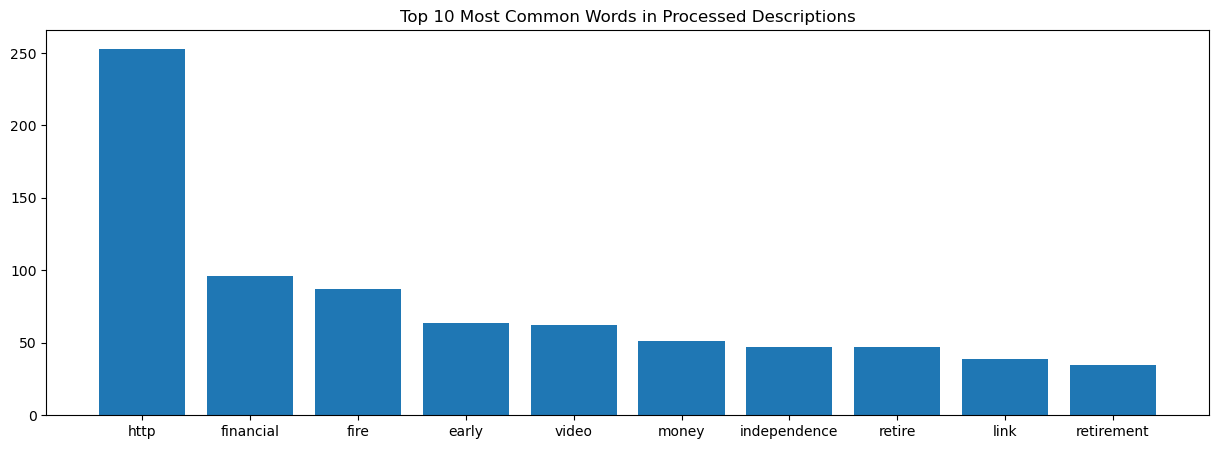

In [41]:
import matplotlib.pyplot as plt

# Visualize the top 10 most common words after processing
labels, values = zip(*processed_freq.most_common(10))

plt.figure(figsize=(15,5))
plt.bar(labels, values)
plt.title('Top 10 Most Common Words in Processed Descriptions')
plt.show()

In [42]:
#check for any remaining stop words
remaining_stopwords = [word for word in processed_words if word in stopwords.words('english')]
print(set(remaining_stopwords))

set()


In [47]:
# Calculate the lengths
df['Original_Length'] = df['Description'].apply(lambda x: len(str(x).split()))
df['Processed_Length'] = df['Processed_Description'].apply(lambda x: len(str(x).split()))

# Print the average lengths as integers
print("Average Original Length:", int(df['Original_Length'].mean()))
print("Average Processed Length:", int(df['Processed_Length'].mean()))

Average Original Length: 284
Average Processed Length: 151


In [44]:
#to check the top 50 words in the comments
# Extract word frequencies from the 'Processed_Comment' column
comment_words = [word for text in df['Processed_Comment'] for word in str(text).split()]
comment_freq = Counter(comment_words)

In [45]:
# Display the top 50 most common words from the processed comments
top_50_comment_words = comment_freq.most_common(50)
for word, freq in top_50_comment_words:
    print(f"{word}: {freq}")

http: 24
plan: 10
income: 8
video: 8
free: 8
investing: 8
financial: 7
money: 7
need: 6
great: 6
year: 5
try: 4
m1: 4
work: 4
fire: 4
enroll: 4
stock: 4
day: 4
program: 4
portugal: 4
aud: 4
real: 4
estate: 4
group: 4
working: 3
premium: 3
made: 3
401k: 3
tax: 3
thing: 3
resource: 3
learn: 3
market: 3
course: 3
right: 3
investment: 3
monthly: 3
love: 3
listed: 3
ibkr: 3
first: 3
live: 3
facebook: 3
retirement: 3
good: 3
finance: 2
transfer: 2
seeking: 2
alpha: 2
instagram: 2


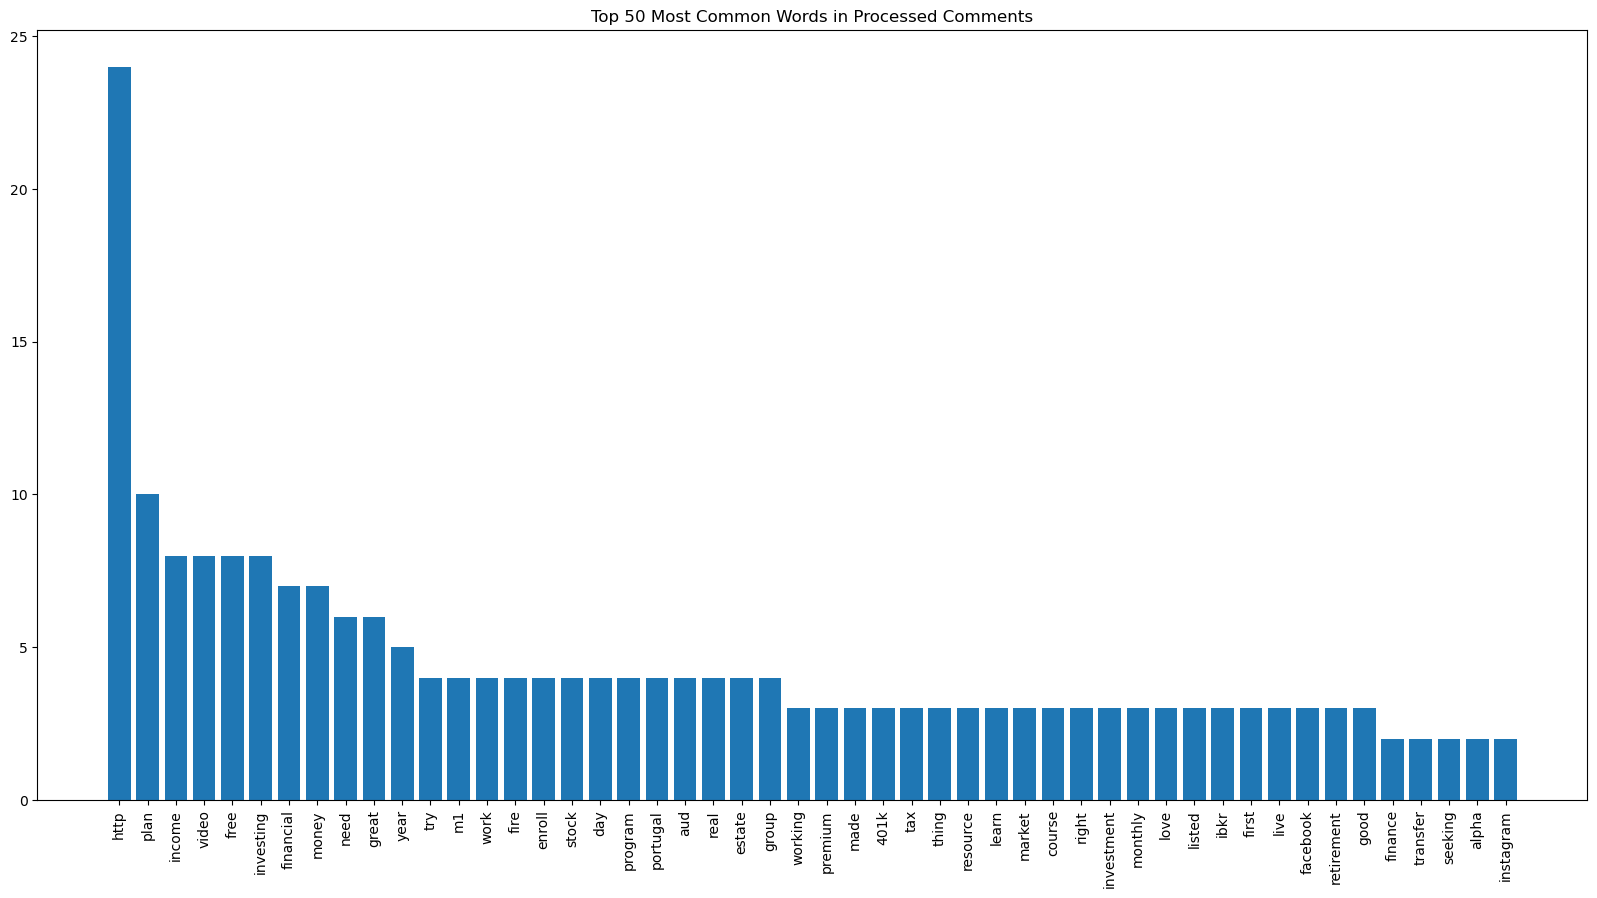

In [46]:
# Visualizing the top 50 most common words
labels, values = zip(*top_50_comment_words)

plt.figure(figsize=(20,10))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.title('Top 50 Most Common Words in Processed Comments')
plt.show()